In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py 
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn import tree
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [41]:
leg_data = pd.read_csv('../input/league-of-legends-game-data/games.csv')
leg_data.head(5)

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


### Data processing 
#### remove seasonld, hero banlist

In [42]:
leg_data.drop(['t2_ban1','t2_ban2','t2_ban3','t2_ban4','t2_ban5'],inplace=True, axis=1)

In [43]:
leg_data.head(5)

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_champ4_sum1,t2_champ4_sum2,t2_champ5id,t2_champ5_sum1,t2_champ5_sum2,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,14,4,412,4,3,5,0,0,1,1
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,4,14,92,4,7,2,0,0,0,0
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,4,11,22,7,4,2,0,0,1,0
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,4,14,22,4,7,0,0,0,0,0
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,4,12,51,4,7,3,0,0,1,0


In [44]:
winner_counts = go.Pie(labels=leg_data['winner'].value_counts().values, 
                values=leg_data['winner'].value_counts().values,
                hole=0.7,
                opacity=0.9,
                marker=dict(line=dict(color='blue', width=1.0))
               ) 
layout = go.Layout(title='Team blue and red,winning condition')

l_data = [winner_counts]
fig = go.Figure(l_data)
fig.show()

In [45]:
pd.crosstab(leg_data['firstBlood'], leg_data['winner'])  

winner,1,2
firstBlood,,
0,298,257
1,15532,10581
2,10247,14575


In [46]:
leg_data['game_duration'] = round(leg_data['gameDuration'] / 60) 

# 选择数据
x1 = leg_data[leg_data['winner'] == 1]['game_duration']
x2 = leg_data[leg_data['winner'] == 2]['game_duration'] 

# 直方图
trace0 = go.Histogram(x=x1, bingroup=25, name='team1', opacity=0.9)
trace1 = go.Histogram(x=x2, bingroup=25, name='team2', opacity=0.9)  

layout = go.Layout(title='game_duration') 

data = [trace0, trace1] 
fig = go.Figure(data, layout)
fig.show()


In [47]:
def plot_bar_vertical(input_col: str, target_col: str, title_name: str):
    cross_table = round(pd.crosstab(leg_data[input_col], leg_data[target_col], normalize='index')*100, 2)

    # 索引
    index_0 = cross_table.columns.tolist()[0] 
    index_1 = cross_table.columns.tolist()[1] 
    
    # 绘图轨迹
    trace0 = go.Bar(x=cross_table.index.tolist(),
                    y=cross_table[index_0].values.tolist(),
                    name=index_0,
                    orientation='v',
                    marker=dict(color='rgb(191,76,81)')
                   ) 
    trace1 = go.Bar(x=cross_table.index.tolist(),  
                    y=cross_table[index_1].values.tolist(),
                    name=index_1,
                    orientation='v',
                    marker=dict(color='rgb(154,203,228)')
                   ) 

    data = [trace0, trace1] 
    # 布局
    layout = go.Layout(title=title_name, bargap=0.4, barmode='stack')
    
    # 画布
    fig = go.Figure(data=data, layout=layout)
    return fig

In [49]:
plot_bar_vertical(input_col='firstBlood', target_col='winner', title_name='First blood winning rate').show()  

In [50]:
pd.crosstab(leg_data['firstInhibitor'], leg_data['winner']) 

winner,1,2
firstInhibitor,,
0,3210,3066
1,20949,2105
2,1918,20242


In [51]:
plot_bar_vertical(input_col='firstInhibitor', target_col='winner', title_name='摧毁第一个水晶对获胜的影响') 

In [52]:
plot_bar_vertical(input_col='firstBaron', target_col='winner', title_name='击杀第一条大龙对获胜影响')

In [53]:
plot_bar_vertical(input_col='firstRiftHerald', target_col='winner', 
                    title_name='击杀第一条峡谷先锋对获胜的影响')

In [54]:
plot_bar_vertical(input_col='t1_towerKills', target_col='winner', title_name='摧毁防御塔数对获胜影响')  

In [55]:
#leg_data = leg_data[(leg_data['gameDuration'] >= 900)

In [56]:
leg_data_model = leg_data[['winner', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
              'firstDragon', 'firstRiftHerald', 't1_towerKills', 't1_inhibitorKills','t1_baronKills',
              't1_dragonKills', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills'
              ]] 
leg_data_model.head() 

,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills
0,1,2,1,1,1,1,2,11,1,2,3,5,0,0,1
1,1,1,1,1,0,1,1,10,4,0,2,2,0,0,0
2,1,2,1,1,1,2,0,8,1,1,1,2,0,0,1
3,1,1,1,1,1,1,0,9,2,1,2,0,0,0,0
4,1,2,1,1,1,1,0,9,2,1,3,3,0,0,1


In [57]:
x = leg_data_model.drop('winner', axis=1)
y = leg_data_model['winner']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

In [58]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
print("score:", clf.score(X_test,y_test)) 

score: 0.9634880559331909


In [59]:
imp = pd.DataFrame(list(zip(X_train.columns, clf.feature_importances_))) 
imp.columns = ['columns', 'importances']
imp = imp.sort_values('importances', ascending=False)
imp

,columns,importances
10,t2_towerKills,0.676064
6,t1_towerKills,0.224928
7,t1_inhibitorKills,0.022665
11,t2_inhibitorKills,0.019768
2,firstInhibitor,0.009216
13,t2_dragonKills,0.008416
9,t1_dragonKills,0.007554
8,t1_baronKills,0.005685
12,t2_baronKills,0.005279
0,firstBlood,0.005184


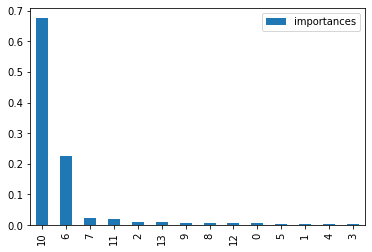

In [60]:
imp.plot.bar()